# CSE 555 Introduction to Pattern Recognition Spring 2020
# Problem Set 5 - Generative Models
## Srisai Karthik Neelamraju, 50316785 neelamra@buffalo.edu

## 2. Derive the variational autoencoder algorithm and explain your derivation.

Variational autoencoders (VAEs) belong to the class of generative models. They can be thought of as directed probabilistic graphical models whose posterior is represented by a neural network. In other words, given some observed data $x$, a variational autoencoder aims to estimate some latent variables $z$. This is equivalent to learning the posterior distribution $p_\theta(z|x)$, where $\theta$ represents the parameters of the approximating neural network. From Bayes' rule,

$$p(z|x) = \int_z \frac{p(x|z)p(z)}{p(x)}dz$$

Clearly, evaluating this posterior distribution is intractable because it involves computing the integral over the entire latent space $z$. Besides, the knowledge of $p(x)$ is also required. Since this calculation is not possible, we aim to approximate the posterior distribution with an other distribution $q_\phi(z|x)$ such that the KL-divergence between these two distributions is minimized. KL-divergence is a measure of the similarity between two probability distributions. It is given by,

$$D_{KL}\left(q_\phi(z|x^{(i)}\ \big|\big|\ p_\theta(z|x^{(i)})\right) = \int q_\phi\left(z|x^{(i)}\right) \log \frac{q_\phi\left(z|x^{(i)}\right)}{p_\theta\left(z|x^{(i)}\right)}dz$$

Using Bayes' rule, this expression can be simplified further as,

\begin{aligned}
D_{KL}\left(q_\phi(z|x^{(i)}\ \big|\big|\ p_\theta(z|x^{(i)})\right) &= \int q_\phi\left(z|x^{(i)}\right) \log \left(\frac{q_\phi\left(z|x^{(i)}\right)p_\theta(x^{(i)})}{p_\theta\left(x^{(i)}|z\right)p_\theta(z)}\right)dz \\
&= \int q_\phi\left(z|x^{(i)}\right) \left[\log \left( \frac{q_\phi\left(z|x^{(i)}\right)}{p_\theta\left(x^{(i)}|z\right)p_\theta(z)} \right) + \log p_\theta(x^{(i)})\right]dz \\
&= \int q_\phi\left(z|x^{(i)}\right) \log \left( \frac{q_\phi\left(z|x^{(i)}\right)}{p_\theta\left(x^{(i)}|z\right)p_\theta(z)} \right)dz + \int q_\phi\left(z|x^{(i)}\right)\log p_\theta(x^{(i)})dz \\
&= \int q_\phi\left(z|x^{(i)}\right) \log \left( \frac{q_\phi\left(z|x^{(i)}\right)}{p_\theta\left(x^{(i)}|z\right)p_\theta(z)} \right)dz + \log p_\theta(x^{(i)}) \underbrace{\int q_\phi\left(z|x^{(i)}\right)dz}_{=1} \\
&= \int q_\phi\left(z|x^{(i)}\right) \log \left( \frac{q_\phi\left(z|x^{(i)}\right)}{p_\theta\left(x^{(i)}|z\right)p_\theta(z)} \right)dz + \log p_\theta(x^{(i)}) \\
&= - \int q_\phi\left(z|x^{(i)}\right) \log \left( \frac{p_\theta\left(x^{(i)}|z\right)p_\theta(z)}{q_\phi\left(z|x^{(i)}\right)} \right)dz + \log p_\theta(x^{(i)})
\end{aligned}

Since KL-divergence is always non-negative, $D_{KL}\left(q_\phi(z|x^{(i)}\ \big|\big|\ p_\theta(z|x^{(i)})\right) \geq 0$. Using this inequality, we can write

\begin{aligned}
\log p_\theta(x^{(i)}) &\geq \int q_\phi\left(z|x^{(i)}\right) \log \left( \frac{p_\theta\left(x^{(i)}|z\right)p_\theta(z)}{q_\phi\left(z|x^{(i)}\right)} \right)dz \\
&\geq \int q_\phi\left(z|x^{(i)}\right) \log \left( \frac{p_\theta(z)}{q_\phi\left(z|x^{(i)}\right)} \right)dz + \int q_\phi\left(z|x^{(i)}\right) \log p_\theta\left(x^{(i)}|z\right) dz \\
&\geq -\int q_\phi\left(z|x^{(i)}\right) \log \left( \frac{q_\phi\left(z|x^{(i)}\right)}{p_\theta(z)} \right)dz + \mathbb{E}_{q_\phi\left(z|x^{(i)}\right)} \left[\log p_\theta\left(x^{(i)}|z\right)\right] \\
&\geq -D_{KL}\left(q_\phi(z|x^{(i)}\ \big|\big|\ p_\theta(z)\right) + \mathbb{E}_{q_\phi\left(z|x^{(i)}\right)} \left[\log p_\theta\left(x^{(i)}|z\right)\right] = \cal L(\theta, \phi;x^{(i)})
\end{aligned}

The expression on the right hand side provides the variational lower bound on the likelihood of data. Since we aim to maximize this likelihood function that is computationally intractable, the objective in this approach is to jointly maximize the lower bound $\cal L$ over $\theta$ and $\phi$ with gradient descent. This corresponds to minimizing the KL-divergence. The other term on the right hand side is a measure of the likelihood of the reconstructed data at the decoder.

In the implementation of a VAE, the approximate posterior distribution $q_\phi(z|x)$ is modeled by a deep neural network. This neural network can be expressed in the form of an encoder and a decoder. The encoder part gives the distribution mean and the standard deviation (sometimes, the network is modelled to sample logarithm of standard deviation since it has more numerical stability) of the latent space. A mean and a standard deviation values are then sampled from the encoder's output and passed on to the decoder, which tries to generate outputs that follow a distribution similar to that of the observed data. This sampling makes these models different from the regular autoencoders and makes them generative.

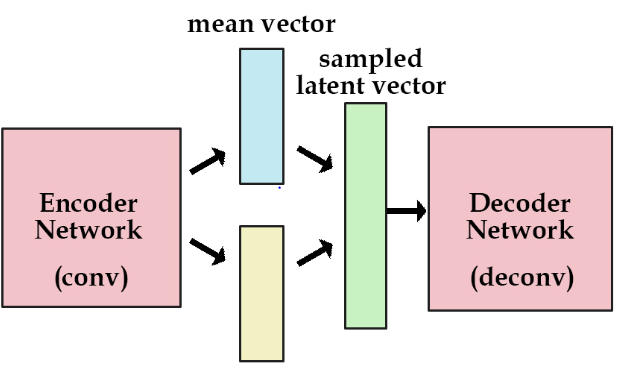

The easiest way to sample $z$ is having $z \sim \cal N(0, 1)$ and thus, we want to make $q_\phi(z|x)$ to be very close to this distribution. Also, another advantage of choosing this distribution is that the KL-divergence between this distribution and a normal distribution with $\cal N(\mu, \Sigma)$ has a closed-form expression. Assuming the network samples logarithm of the standard deviation (as in the following implementations), this KL-divergence is found using the relation [4],

$$D_{KL}\left(\cal N(\mu, \Sigma)\ \big|\big|\ \cal N(0,1)\right) = \frac{1}{2}\sum_k \left(\mu^2 + e^{\Sigma} - 1 - \Sigma\right)$$

In this way, the VAE algorithm can be described. The exact algorithm is implemented below to generate MNIST images.

## Implementing VAE to generate MNIST images

### Importing the required libraries

NumPy is used for basic matrix operations.<br>
TensorFlow is used to implement the neural networks and import the MNIST dataset.<br>
Matplotlib is used for visualizing images generated by the VAE.<br>

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras import backend as k
from matplotlib import pyplot as plt

### Loading the MNIST dataset

MNIST Dataset contains 28 $\times$ 28 dimensional grayscale images of handwritten digits from 0 to 9. Specifically, there are 60,000 images in the training set and 10,000 images in the test set. Each of these 70,000 images belongs to one of these 10 classes and has associated with it a label from 0 to 9.

In [2]:
# loading the dataset consisting of 60,000 training images
(X_train, _), (_, _) = mnist.load_data()

x_dim, y_dim = X_train[0].shape

# reshaping the input array to include channels
X_train = X_train.reshape(X_train.shape[0], x_dim, y_dim, 1)

# normalizing the data
X_train =  X_train / 255

### Creating a class for implementing a Variational Autoencoder

In [3]:
class VAE:
    """
        implements a variational autoencoder (VAE)
    """

    def __init__(self, latent_dim, show_summary=False):
        """
            initializes a VAE
        """
        self.latent_dim = latent_dim
        
        # defining the encoder architecture
        self.encoder = self.init_encoder()

        # defining the mean and standard deviation layers
        self.mean_vector = tf.keras.layers.Dense(self.latent_dim, name='mean_vector')(self.encoder.output)
        self.std_vector = tf.keras.layers.Dense(self.latent_dim, name='std_vector')(self.encoder.output)
        
        # sampling latent vector [3]
        def sampling(args):
            mean, std = args
            batch_size = k.shape(mean)[0]
            latent_dim = k.int_shape(std)[1]
            epsilon = k.random_normal(shape=(batch_size, latent_dim))
            return mean + k.exp(0.5 * std) * epsilon
        
        # adding the sampling layer to the encoder architecture
        self.sampled_vector = tf.keras.layers.Lambda(sampling, name='sampled_vector')([self.mean_vector, self.std_vector])
        self.encoder = tf.keras.Model(self.encoder.inputs, outputs=[self.mean_vector,self.std_vector, self.sampled_vector])

        # defining the decoder architecture
        self.decoder = self.init_decoder()

        # defining the combined VAE architecture
        self.vae = tf.keras.Model(self.encoder.inputs, self.decoder(self.encoder(self.encoder.inputs)[2]))

        # defining the VAE loss [3]
        def custom_loss():
            reconst_loss = tf.keras.losses.mse(k.flatten(self.vae.inputs), k.flatten(self.vae.output)) * x_dim * y_dim
            kl_div = - 0.5 * k.sum(1 + self.std_vector - k.square(self.mean_vector) - k.exp(self.std_vector), axis=-1)
            return k.mean(reconst_loss + kl_div)
    
        # compiling the VAE model
        self.vae.add_loss(custom_loss())
        self.vae.compile(optimizer=tf.keras.optimizers.Adam())

        if show_summary:
            print("Encoder Network")
            self.encoder.summary()
            print("Decoder Network")
            self.decoder.summary()
            print("VAE Combined Network")
            self.vae.summary()

    def init_encoder(self):
        """
            encoder neural network with dense layers
        """
        encoder = tf.keras.Sequential()
        encoder.add(tf.keras.layers.Flatten(input_shape=(x_dim, y_dim, 1)))
        encoder.add(tf.keras.layers.Dense(256, activation='relu'))
        return encoder

    def init_decoder(self):
        """
            decoder neural network with dense layers
        """
        decoder = tf.keras.Sequential(name='decoder')
        decoder.add(tf.keras.layers.Dense(256, activation='relu', input_shape=(self.latent_dim, )))
        decoder.add(tf.keras.layers.Dense(x_dim*y_dim, activation='sigmoid'))
        return decoder
    
    def train(self, X_train, epochs=30, batch_size=32):
        """
            trains the VAE on the MNIST training set
        """
        print("Training the VAE for " + str(epochs) + " epochs...")
        self.vae.fit(X_train, batch_size=batch_size, epochs=epochs, verbose=False)
        print("DONE")

    def generate_images(self, n=25):
        """
            generates images from the VAE
        """
        print("Generating some images from the trained VAE")
        fig = plt.figure(figsize=(7, 7))
        for i in range(n):
            sub = fig.add_subplot(5, 5, i + 1)
            sub.imshow(self.decoder.predict(np.random.normal(size=(1, self.latent_dim))).reshape(x_dim, y_dim), cmap='gray')
            plt.axis('off')

### VAE with 2 code units

Instructions for updating:
Colocations handled automatically by placer.
Training the VAE for 30 epochs...
Instructions for updating:
Use tf.cast instead.
DONE
Generating some images from the trained VAE


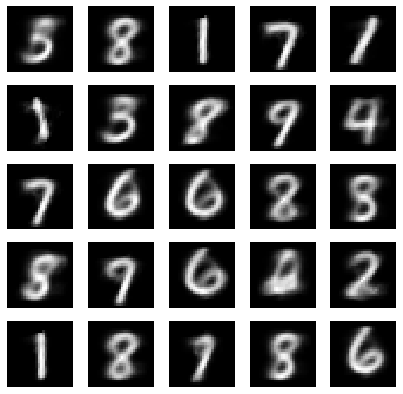

In [4]:
vae1 = VAE(2)
vae1.train(X_train, epochs=30)
vae1.generate_images()

### VAE with 8 code units

Training the VAE for 50 epochs...
DONE
Generating some images from the trained VAE


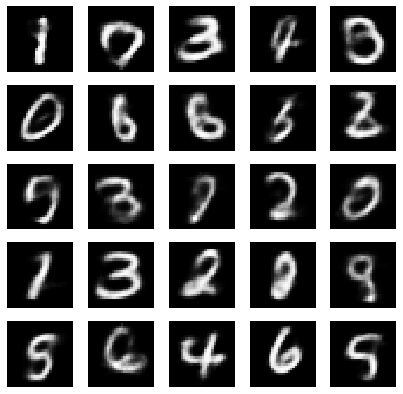

In [5]:
vae2 = VAE(8)
vae2.train(X_train, epochs=50)
vae2.generate_images()

### VAE with 16 code units

Training the VAE for 50 epochs...
DONE
Generating some images from the trained VAE


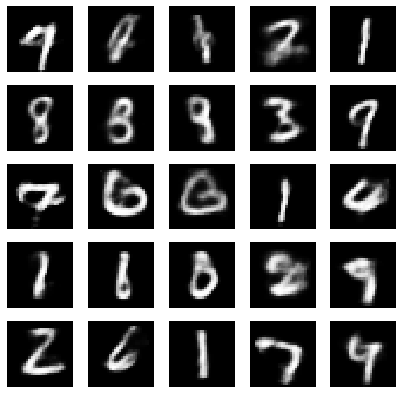

In [6]:
vae3 = VAE(16)
vae3.train(X_train, epochs=50)
vae3.generate_images()

### Generating images from VAE with 2 code units by varying them from -3 to 3

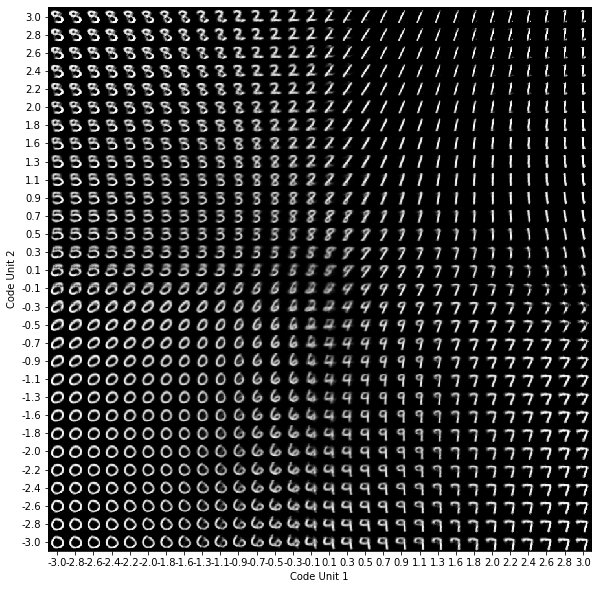

In [7]:
n = 30
gen_plot = np.zeros((n*x_dim, n*y_dim))
C1 = np.linspace(-3, 3, n)
C2 = np.linspace(3, -3, n)

for i, c1 in enumerate(C1):
    for j, c2 in enumerate(C2):
        sample = np.array([[c1, c2]])
        pred = vae1.decoder.predict(sample)
        gen_plot[i*y_dim: (i + 1)*y_dim, j*x_dim: (j + 1)*x_dim] = pred.reshape(x_dim, y_dim)

# this plot code is referenced from [3]
plt.figure(figsize=(10, 10))
start = x_dim // 2
end = n * x_dim + start + 1
pixel_range = np.arange(start, end, x_dim)
sample_range_x = np.round(C1, 1)
sample_range_y = np.round(C2, 1)
plt.xticks(pixel_range, sample_range_x)
plt.yticks(pixel_range, sample_range_y)
plt.xlabel("Code Unit 1")
plt.ylabel("Code Unit 2")
plt.imshow(gen_plot, cmap='gray')
plt.show()

### References

1. Duda, Richard O., Peter E. Hart, and David G. Stork. Pattern Classification. John Wiley & Sons, 2012. <br>
2. CSE 555 Intoduction to Pattern Recognition Lecture Slides by Prof. Wen Dong <br>
3. https://github.com/keras-team/keras/blob/master/examples/variational_autoencoder_deconv.py <br>
4. https://wiseodd.github.io/techblog/2016/12/10/variational-autoencoder/ <br>
5. https://medium.com/retina-ai-health-inc/variational-inference-derivation-of-the-variational-autoencoder-vae-loss-function-a-true-story-3543a3dc67ee <br>
6. http://kvfrans.com/variational-autoencoders-explained/ <br>
7. http://yann.lecun.com/exdb/mnist/